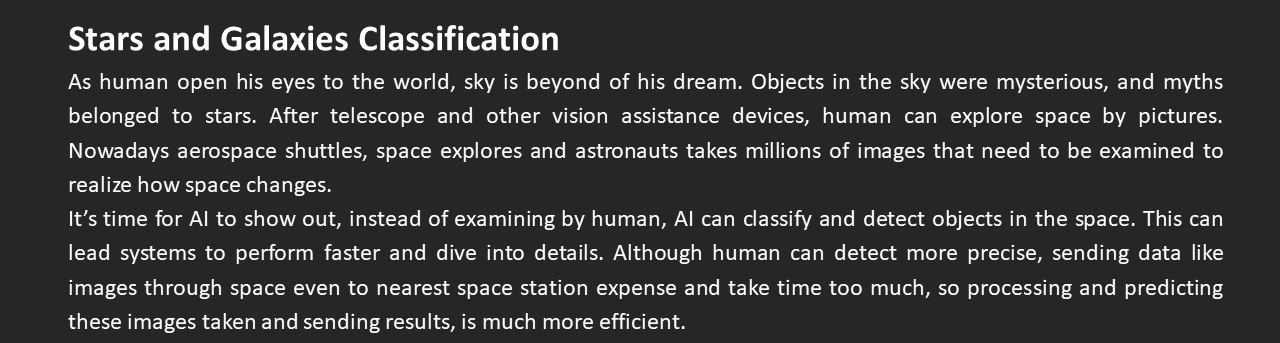

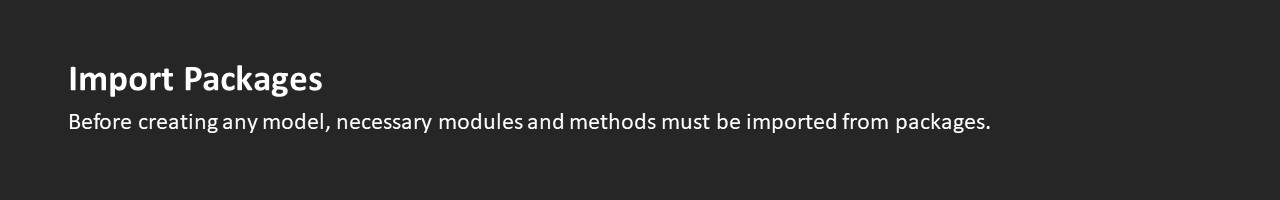

In [1]:
import tensorflow as tf

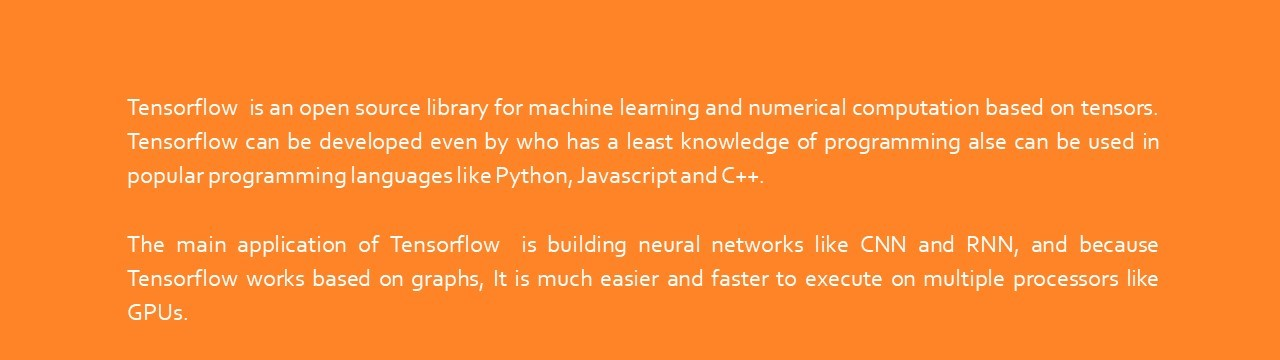

In [2]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

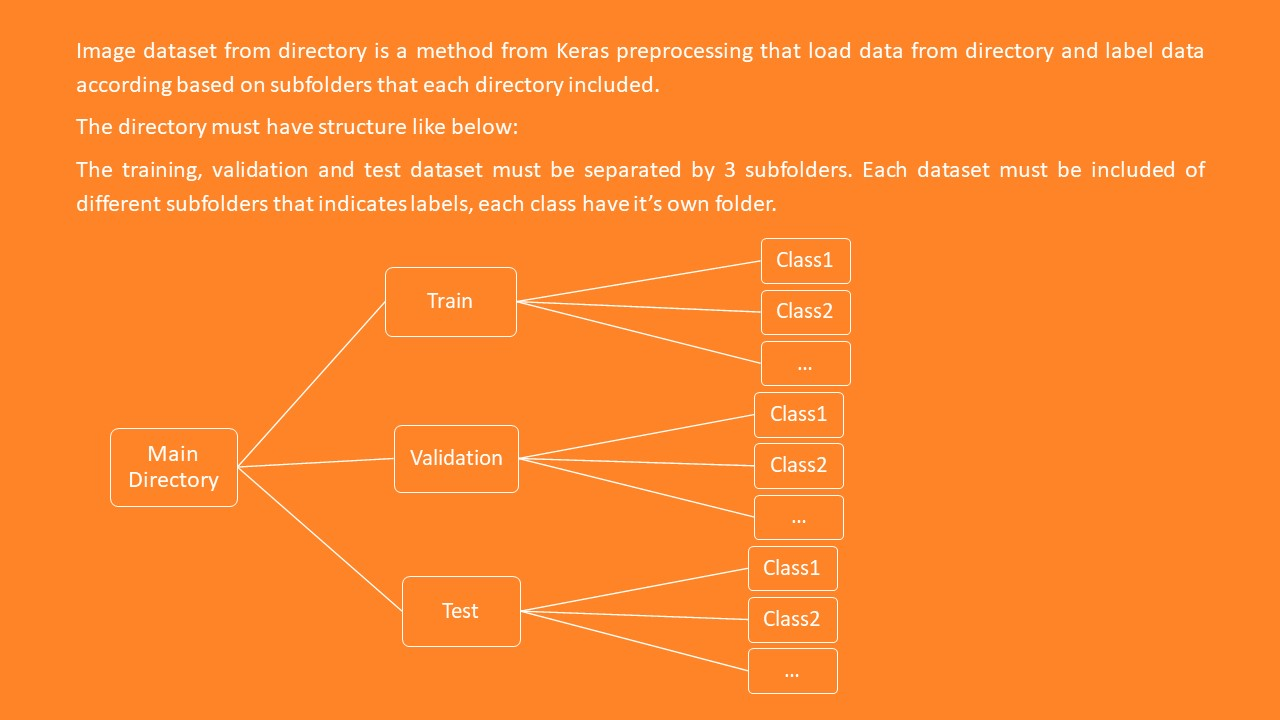

In [3]:
from tensorflow.keras.layers import Input, Flatten, Dense

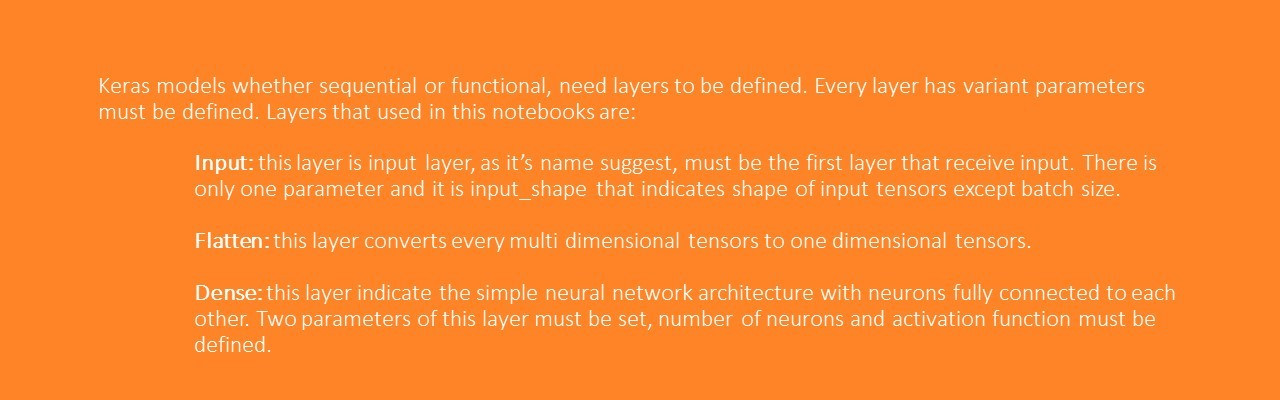

In [4]:
from tensorflow.keras.applications import inception_v3

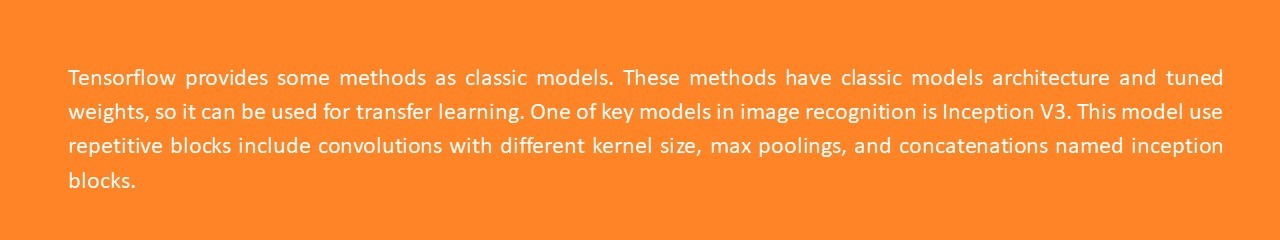

In [5]:
import matplotlib.pyplot as plt

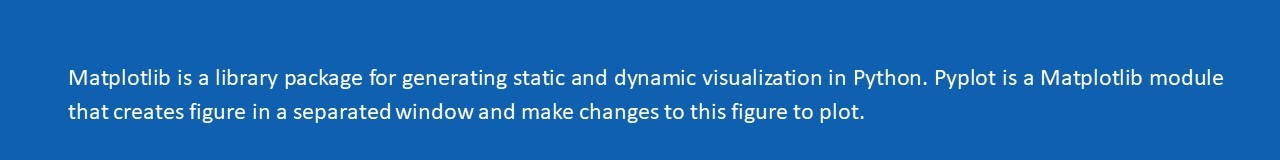

In [6]:
import numpy as np

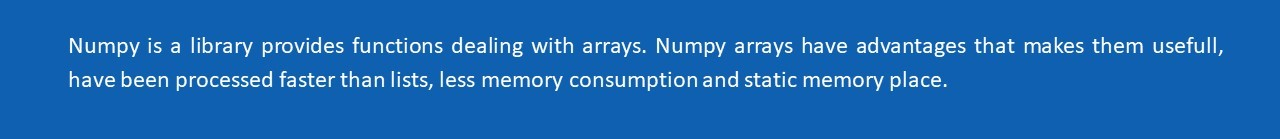

In [7]:
from sklearn.metrics import classification_report

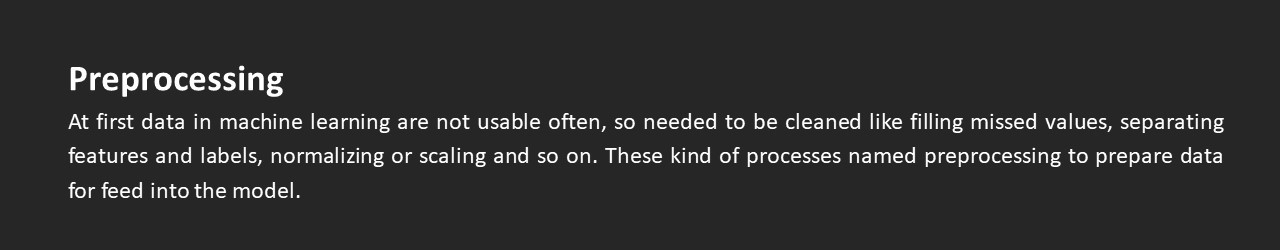

In [8]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

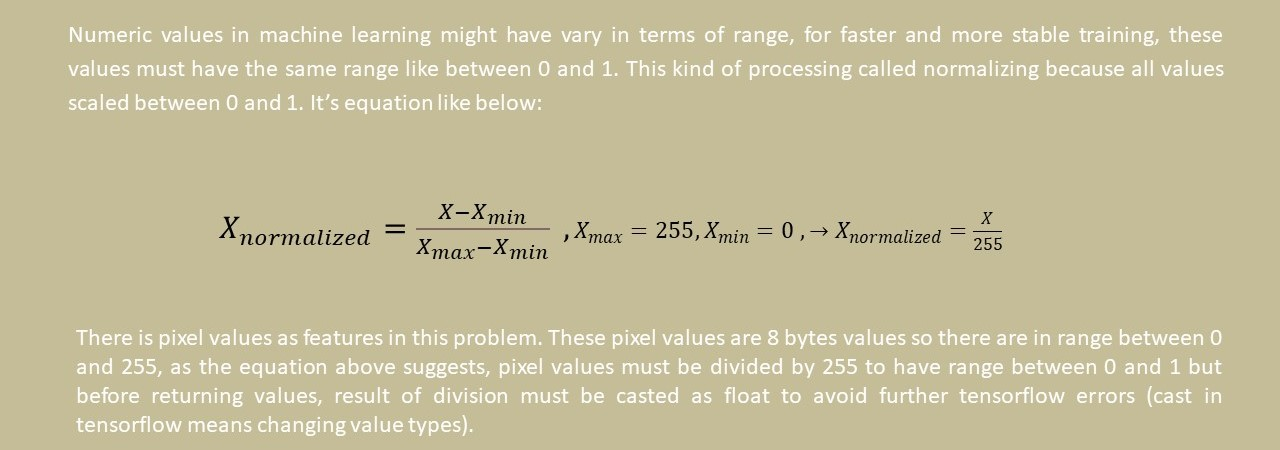

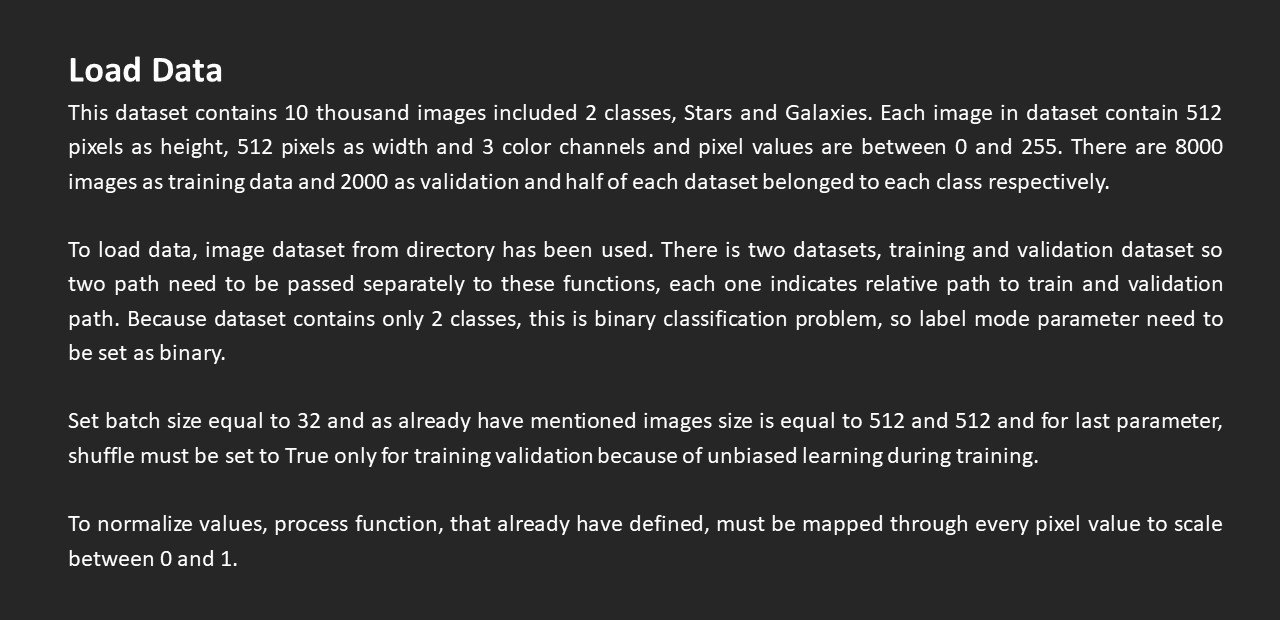

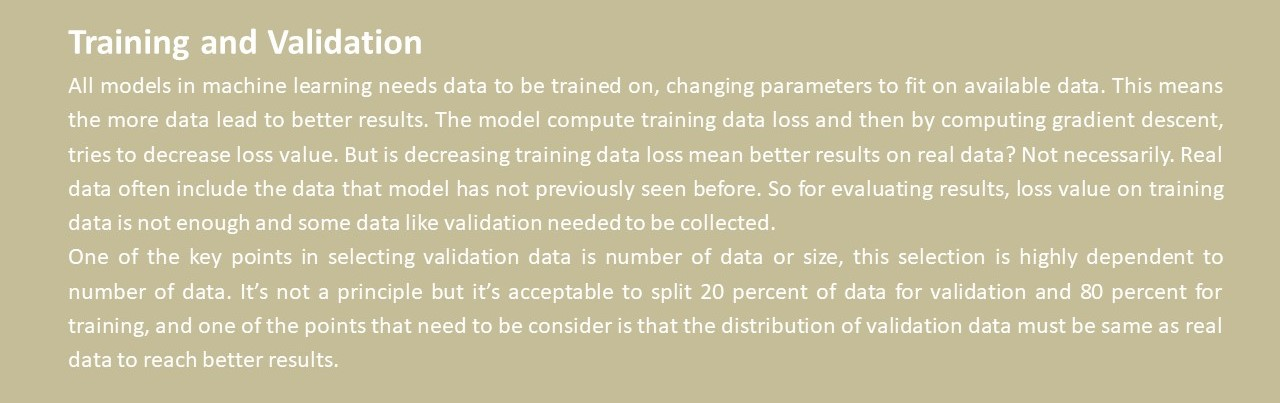

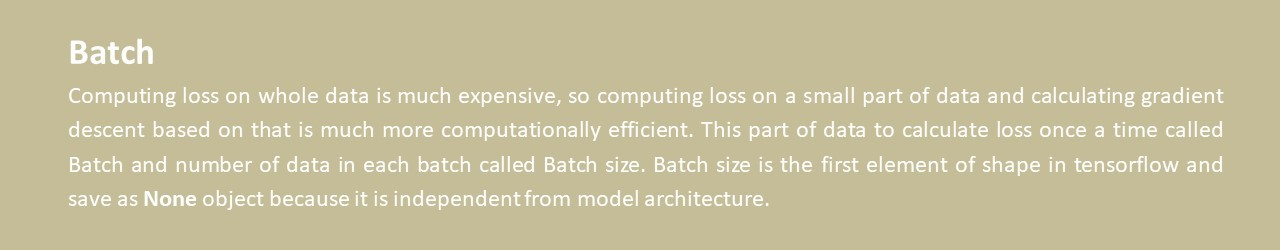

In [9]:
BATCH_SIZE = 32
training_directory = "/content/drive/MyDrive/Colab/AI book/Chapter 3/Chapter 3 Data/data/train"
validation_directory = "/content/drive/MyDrive/Colab/AI book/Chapter 3/Chapter 3 Data/data/validation"
test_directory = "/content/drive/MyDrive/Colab/AI book/Chapter 3/Chapter 3 Data/data/test"

training_data = image_dataset_from_directory(training_directory, label_mode='binary', batch_size=BATCH_SIZE, image_size=(512, 512), shuffle= True)
training_data.map(process)

validation_data = image_dataset_from_directory(validation_directory, label_mode='binary', batch_size=BATCH_SIZE, image_size=(512, 512))
validation_data.map(process)

test_data = image_dataset_from_directory(test_directory, label_mode='binary', batch_size=BATCH_SIZE, image_size=(512, 512))
test_data.map(process)

Found 8000 files belonging to 2 classes.
Found 1600 files belonging to 2 classes.
Found 400 files belonging to 2 classes.


<MapDataset element_spec=(TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

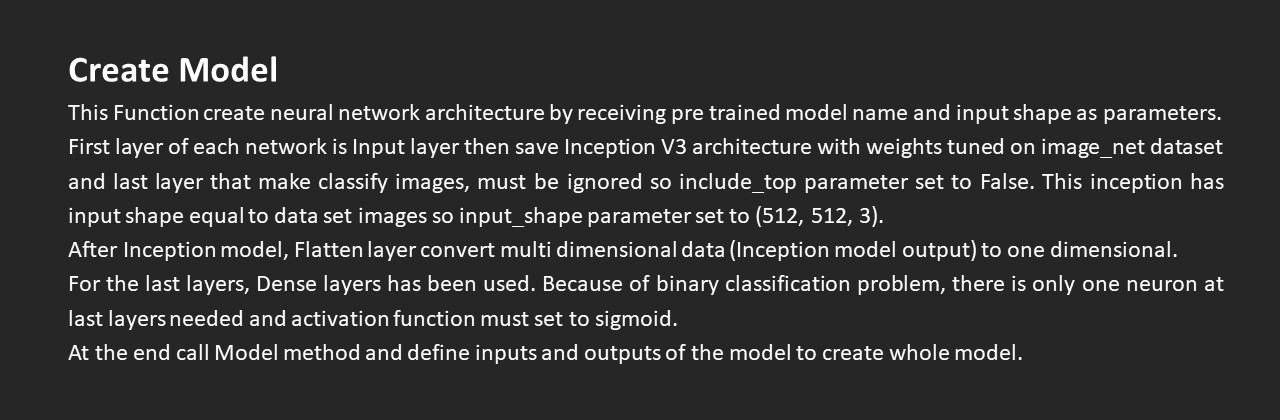

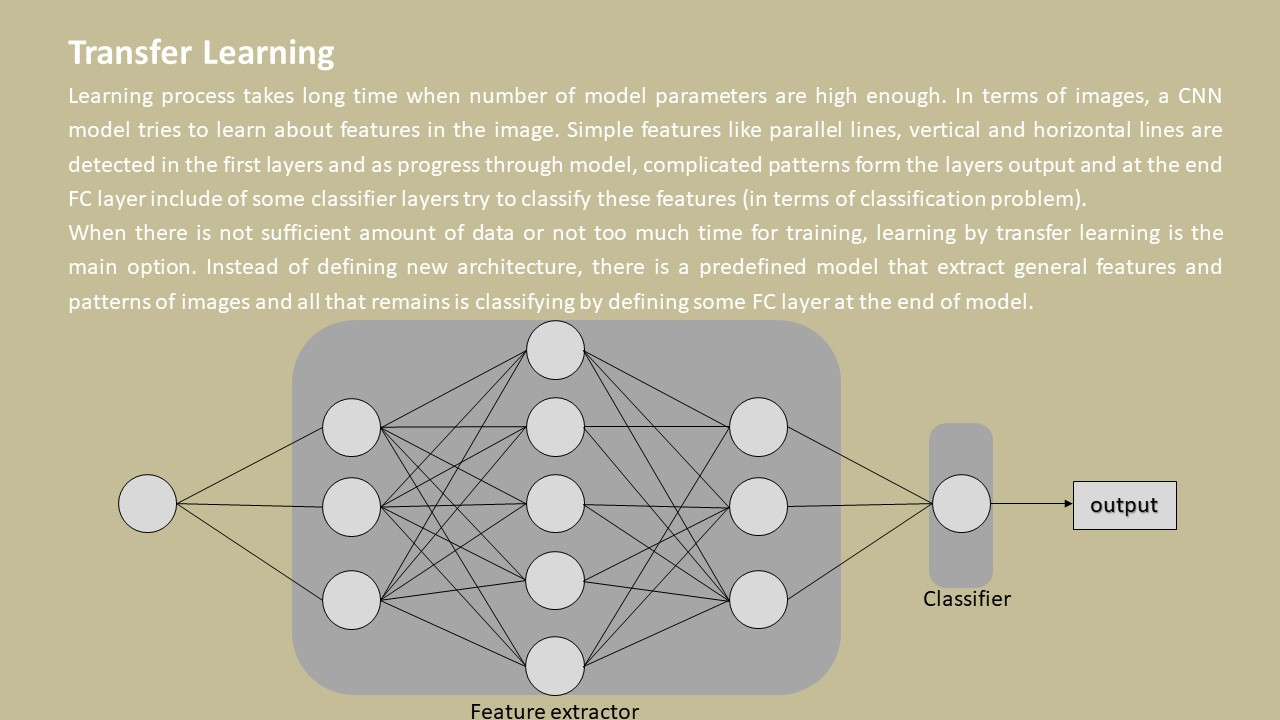

In [10]:
def create_model(pre_trained_model = 'inception', input_shape=(512, 512, 3)):
    inputs = Input(shape=input_shape)
    if pre_trained_model == 'inception':
        pre_trained_model = inception_v3.InceptionV3(include_top=False, input_shape=(512, 512, 3))
    x = pre_trained_model(inputs)
    x = Flatten()(x)
    x = Dense(1, activation='sigmoid')(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=x)
    return model

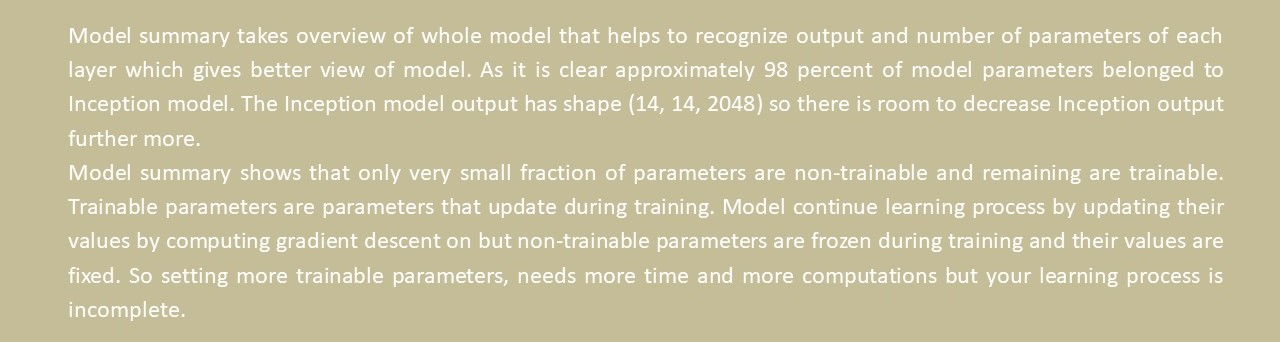

In [11]:
model = create_model()
model.summary()

87910968/87910968 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 512, 512, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, 14, 14, 2048)      21802784  
                                                                 
 flatten (Flatten)           (None, 401408)            0         
                                                                 
 dense (Dense)               (None, 1)                 401409    
                                                                 
Total params: 22,204,193
Trainable params: 22,169,761
Non-trainable params: 34,432
_________________________________________________________________


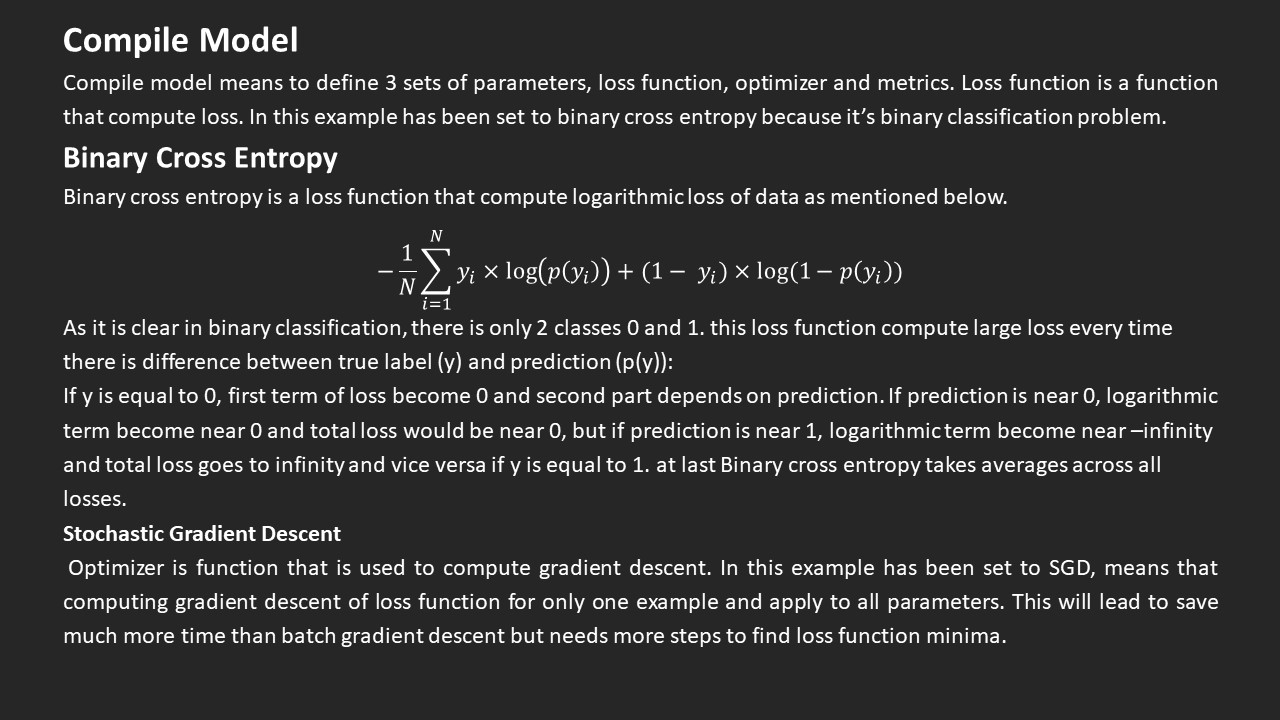

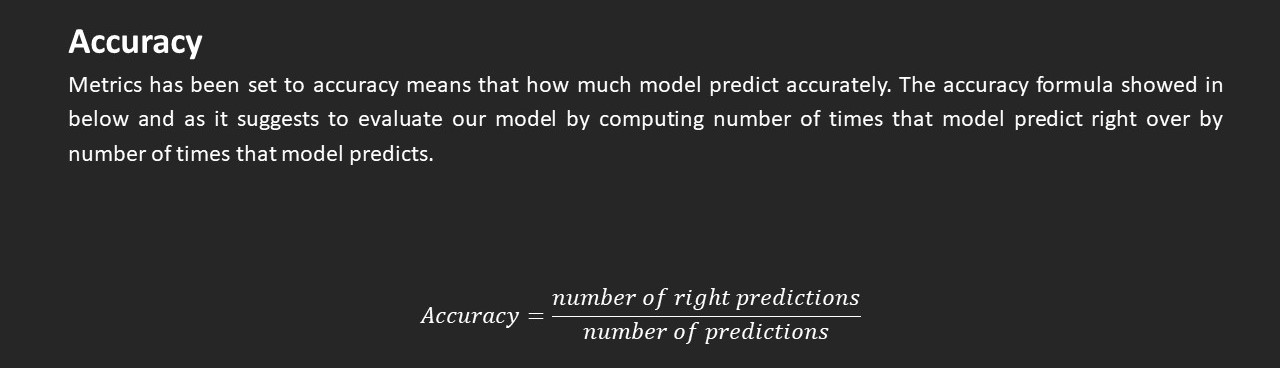

In [12]:
base_learning_rate = 0.01
model.compile(optimizer=tf.keras.optimizers.SGD(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


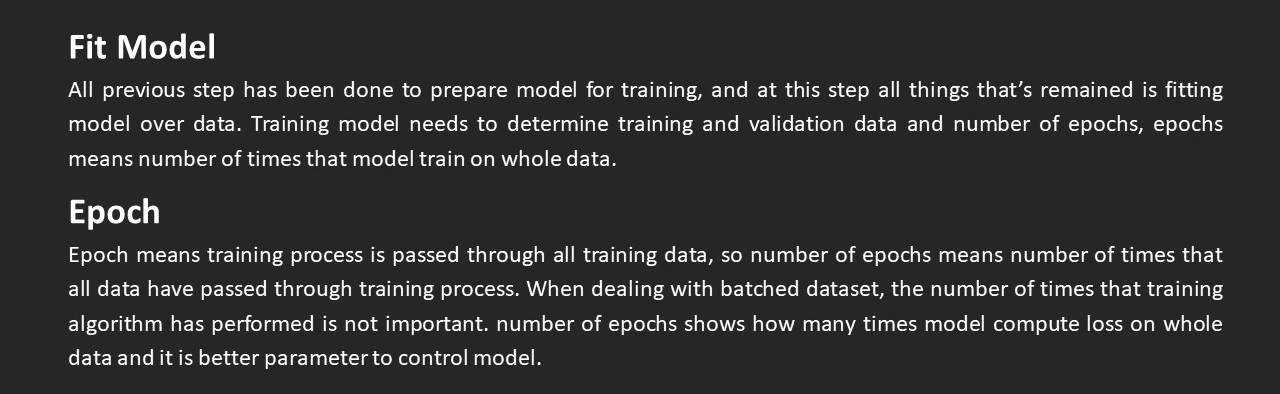

In [13]:
history = model.fit(training_data, validation_data=validation_data, epochs=15, verbose=1)

Epoch 1/15
250/250 [==============================] - 709s 2s/step - loss: 0.9152 - accuracy: 0.8289 - val_loss: 0.4364 - val_accuracy: 0.9100
Epoch 2/15
250/250 [==============================] - 357s 1s/step - loss: 0.2070 - accuracy: 0.9316 - val_loss: 0.1602 - val_accuracy: 0.9488
Epoch 3/15
250/250 [==============================] - 362s 1s/step - loss: 0.1854 - accuracy: 0.9339 - val_loss: 0.1697 - val_accuracy: 0.9419
Epoch 4/15
250/250 [==============================] - 362s 1s/step - loss: 0.1691 - accuracy: 0.9383 - val_loss: 0.1783 - val_accuracy: 0.9413
Epoch 5/15
250/250 [==============================] - 360s 1s/step - loss: 0.1573 - accuracy: 0.9413 - val_loss: 0.1475 - val_accuracy: 0.9469
Epoch 6/15
250/250 [==============================] - 362s 1s/step - loss: 0.1581 - accuracy: 0.9430 - val_loss: 0.1424 - val_accuracy: 0.9488
Epoch 7/15
250/250 [==============================] - 359s 1s/step - loss: 0.1407 - accuracy: 0.9475 - val_loss: 0.1382 - val_accuracy: 0.9513

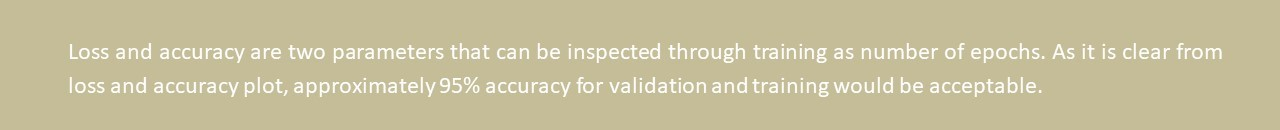

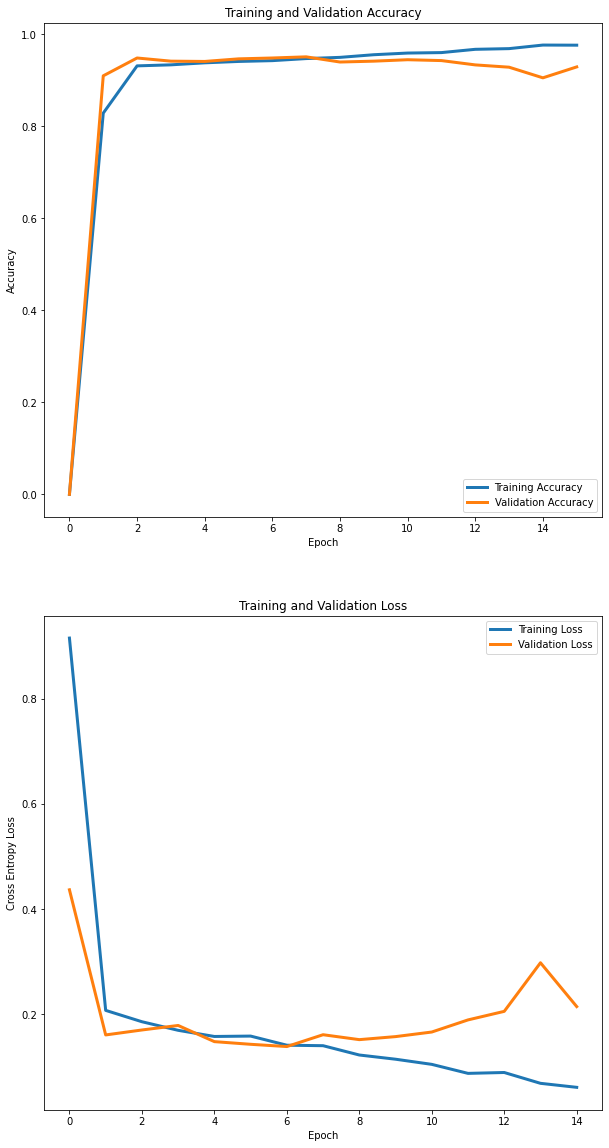

In [14]:
  acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

fig = plt.figure(figsize=(10, 20))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy', linewidth=3)
plt.plot(val_acc, label='Validation Accuracy', linewidth=3)
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.xlabel("Epoch")
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss', linewidth=3)
plt.plot(val_loss, label='Validation Loss', linewidth=3)
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy Loss')
plt.xlabel("Epoch")
plt.title('Training and Validation Loss')
plt.show()

In [17]:
true_labels = []
predictions = []
for images, labels in test_data.take(-1):
  preds = model.predict(images)
  labels = np.array(labels)
  for label in labels:
    true_labels.append(int(label))
  for pred in preds:
    predictions.append(int(pred >= 0.5))
print(classification_report(true_labels, predictions, target_names=["Star", "Galaxy"]))

1/1 [==============================] - 0s 55ms/step
              precision    recall  f1-score   support

        Star       0.94      0.91      0.92       200
      Galaxy       0.91      0.94      0.93       200

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.92       400
weighted avg       0.93      0.93      0.92       400

